In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Dataset_Customer_Churn_Prediction.txt")

## Descrizione del dataset

### Descrizione delle varie features

customerID: Contains customer ID -> categorical
gender: whether the customer female or male -> categorical
SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) -> categorical
Partner: Whether the customer has a partner or not (Yes, No) -> categorical
Dependents: Whether the customer has dependents or not (Yes, No) -> categorical
tenure: Number of months the customer has stayed with the company -> numeric
PhoneService: Whether the customer has a phone service or not (Yes, No) -> categorical
MultipleLines: Whether the customer has multiple lines r not (Yes, No, No phone service) -> categorical
InternetService: Customer’s internet service provider (DSL, Fiber optic, No) -> categorical
OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service) -> categorical
OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service) -> categorical
DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service) -> categorical
TechSupport: Whether the customer has tech support or not (Yes, No, No internet service) -> categorical
streamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service) -> categorical
streamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service) -> categorical
Contract: The contract term of the customer (Month-to-month, One year, Two year) -> categorical
PaperlessBilling: Whether the customer has paperless billing or not (Yes, No) -> categorical
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card) -> categorical
MonthlyCharges: The amount charged to the customer monthly -> numeric
TotalCharges: The total amount charged to the customer -> object
Churn: Whether the customer churned or not (Yes or No) -> categorical

In [3]:
dataset.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
dataset.customerID.count()

7043

In [5]:
dataset['SeniorCitizen'] = pd.Categorical(dataset.SeniorCitizen.values)

In [6]:
dataset['TotalCharges'] = pd.to_numeric(dataset.TotalCharges.values, errors='coerce')

In [7]:
np.sum(dataset.TotalCharges.isna())

11

In [8]:
np.sum(dataset.TotalCharges.isna())/dataset.customerID.count()*100

0.1561834445548772

In [9]:
def drop_data(df:pd.DataFrame) -> pd.DataFrame:
    
    df = df.drop(columns=['customerID'])
    df = df.dropna().reset_index()
    
    return df

In [10]:
dataset = drop_data(dataset)

In [11]:
# dataset.info()

In [12]:
dataset.describe(include=['object']).T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


##### Missing Values

<Axes: ylabel='Frequency'>

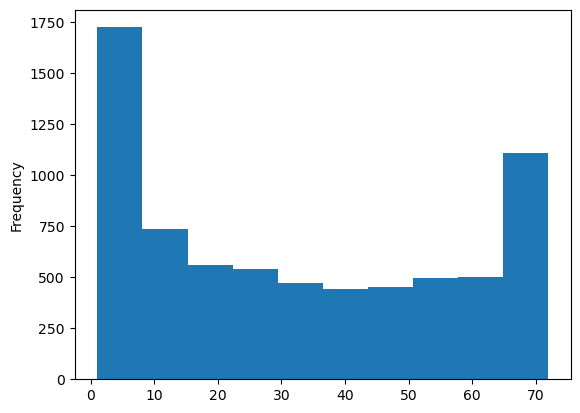

In [13]:
dataset.tenure.plot(kind='hist')

<Axes: ylabel='Frequency'>

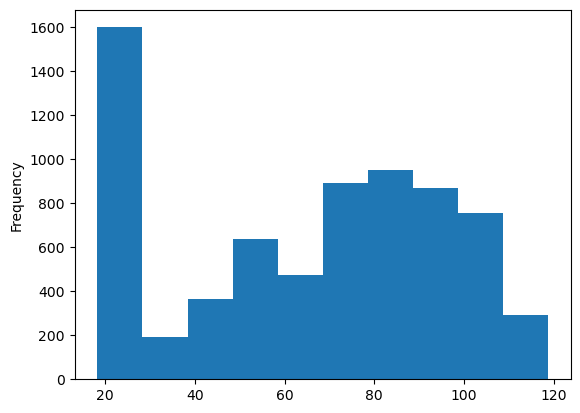

In [14]:
dataset.MonthlyCharges.plot(kind='hist')

<Axes: ylabel='Frequency'>

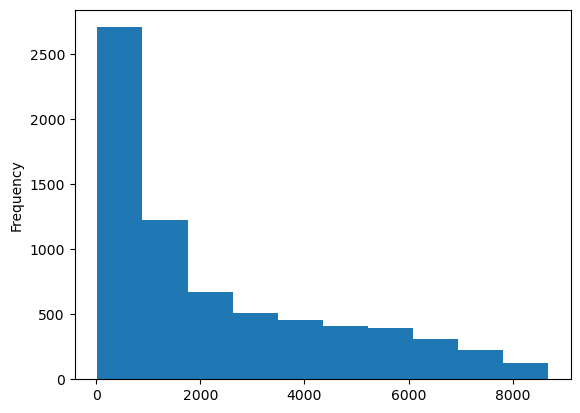

In [15]:
dataset.TotalCharges.plot(kind='hist')

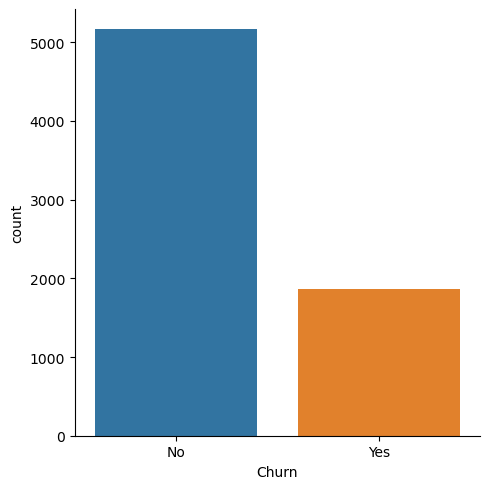

In [16]:
sns.catplot(x="Churn", kind="count", data=dataset)
plt.show()

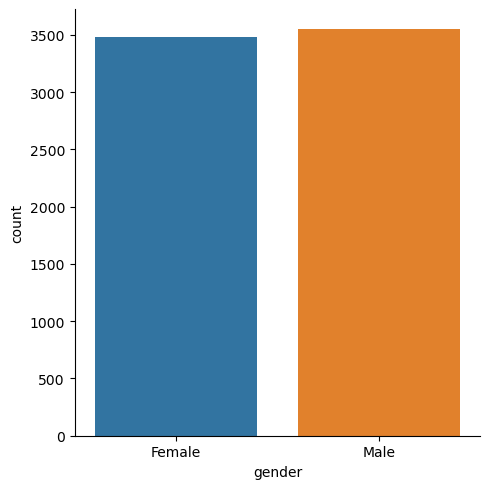

In [17]:
sns.catplot(x="gender", kind="count", data=dataset)
plt.show()

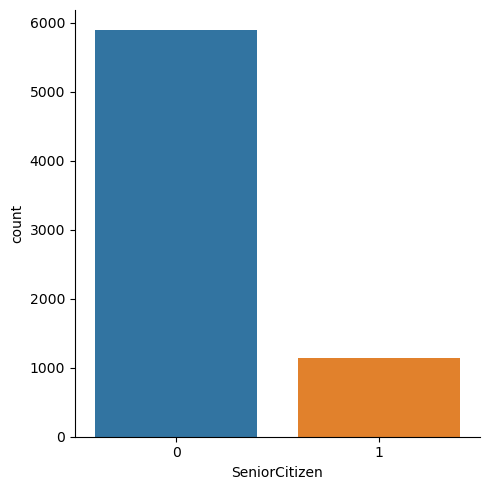

In [18]:
sns.catplot(x="SeniorCitizen", kind="count", data=dataset)
plt.show()

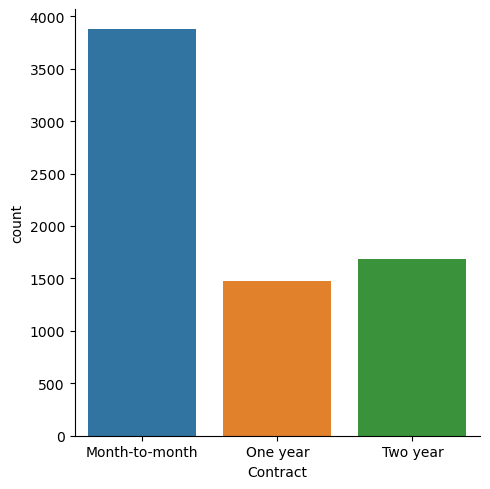

In [19]:
sns.catplot(x="Contract", kind="count", data=dataset)
plt.show()

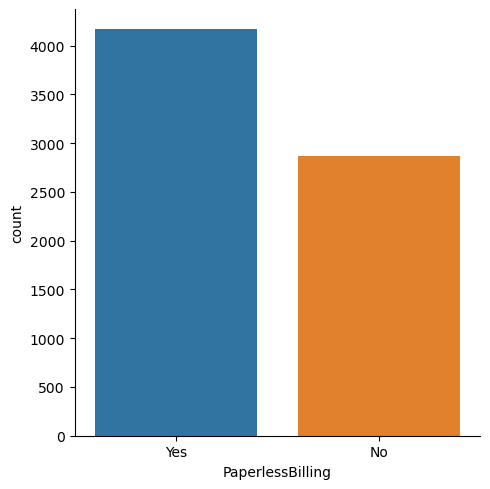

In [20]:
sns.catplot(x="PaperlessBilling", kind="count", data=dataset)
plt.show()

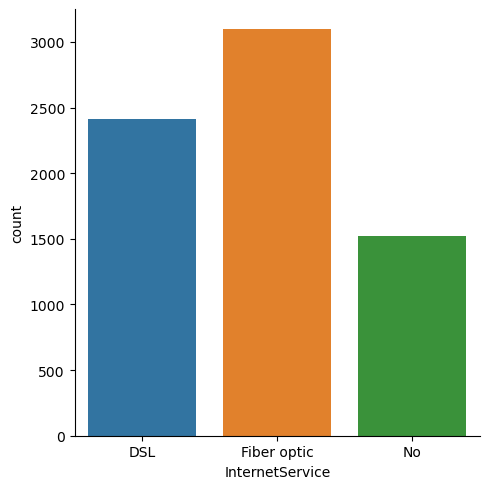

In [21]:
sns.catplot(x="InternetService", kind="count", data=dataset)
plt.show()

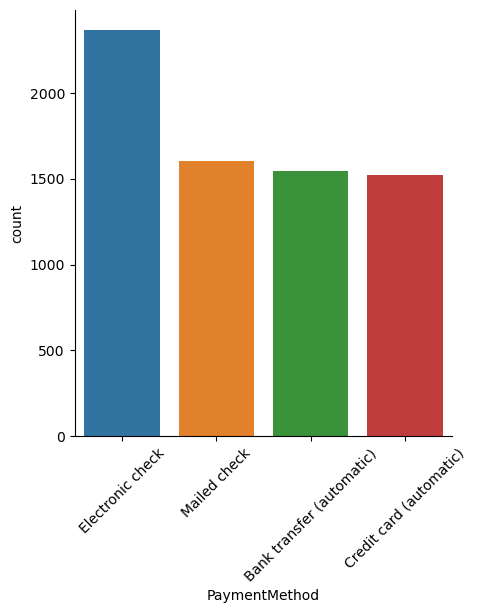

In [22]:
plot = sns.catplot(x="PaymentMethod", kind="count", data=dataset)
# plt.setp(plot.get_xticklabels(), rotation=90)
plot.set_xticklabels(rotation=45)
plt.show()

In [23]:
# df = dataset

# df['tenure_binned'] = pd.cut(df['tenure'], bins=5, labels=False)

# # Calculate the count of 'yes' in each bin
# count_yes = df[df['Churn'] == 'Yes'].groupby('tenure_binned').size()

# # Create a barplot
# sns.barplot(x=count_yes.index, y=count_yes.values)

# # Add labels
# plt.xlabel('Numeric Feature Bins')
# plt.ylabel('Count of "Yes"')
# plt.title('Count of "Yes" in Each Bin of Numeric Feature')

<Axes: xlabel='tenure', ylabel='Count'>

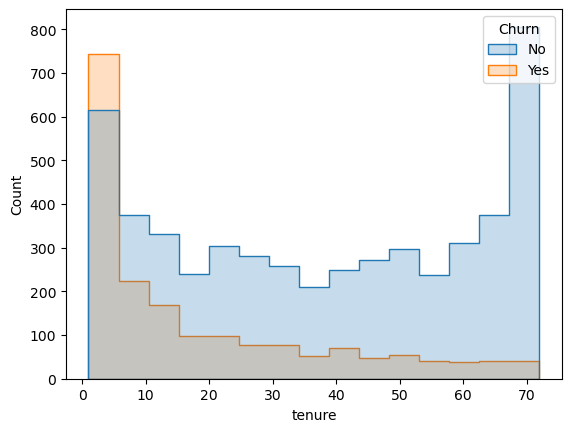

In [24]:
# Create a histogram for each category in the categorical feature
sns.histplot(data=dataset, x='tenure', hue='Churn', element="step", stat="count", common_norm=False) #density

<Axes: xlabel='TotalCharges', ylabel='Density'>

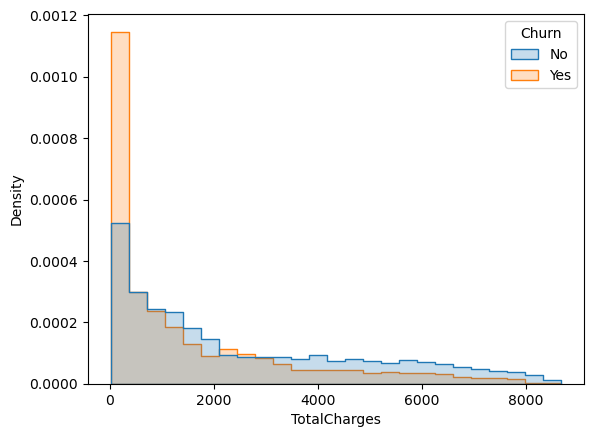

In [25]:
sns.histplot(data=dataset, x='TotalCharges', hue='Churn', element="step", stat="density", common_norm=False)

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

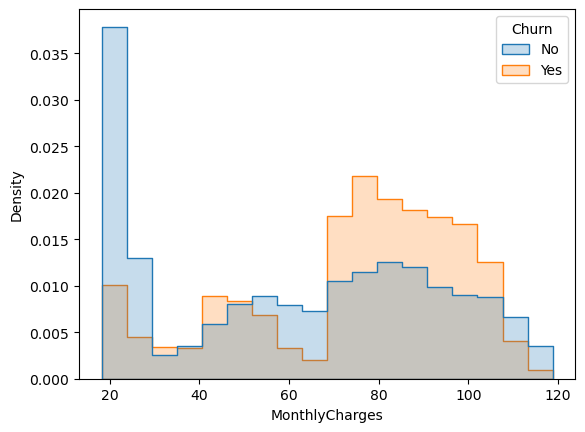

In [26]:
sns.histplot(data=dataset, x='MonthlyCharges', hue='Churn', element="step", stat="density", common_norm=False)

In [27]:
# sns.countplot(x='Churn', hue='gender', data=dataset)

<Axes: xlabel='gender'>

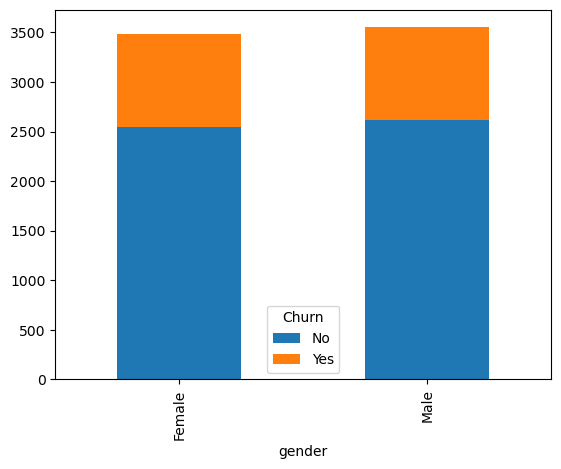

In [28]:
# Calculate the count of observations for each combination of categories
counts = dataset.groupby(['gender', 'Churn']).size().unstack()

# Create a stacked column chart
counts.plot(kind='bar', stacked=True)

In [29]:
# sns.countplot(x='Churn', hue='SeniorCitizen', data=dataset)

<Axes: xlabel='SeniorCitizen'>

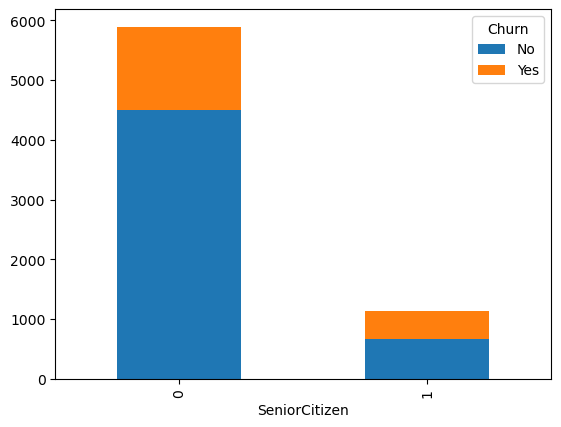

In [30]:
# Calculate the count of observations for each combination of categories
counts = dataset.groupby(['SeniorCitizen','Churn']).size().unstack()

# Create a stacked column chart
counts.plot(kind='bar', stacked=True)

In [31]:
# sns.countplot(x='Churn', hue='Contract', data=dataset)

<Axes: xlabel='Contract'>

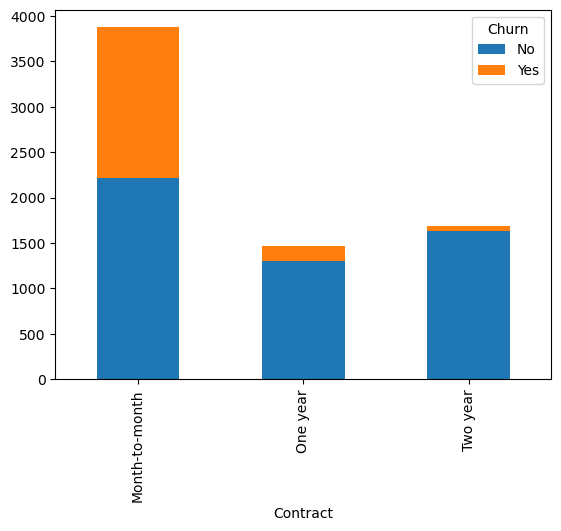

In [32]:
# Calculate the count of observations for each combination of categories
counts = dataset.groupby(['Contract', 'Churn']).size().unstack()

# Create a stacked column chart
counts.plot(kind='bar', stacked=True)

In [33]:
# sns.countplot(hue='Churn', x='SeniorCitizen', data=dataset)

<Axes: xlabel='PaperlessBilling'>

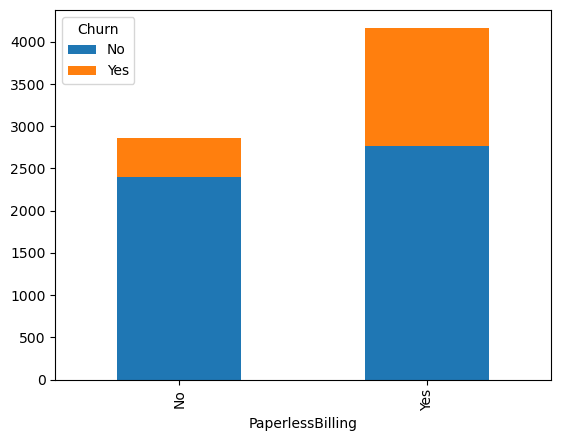

In [34]:
# Calculate the count of observations for each combination of categories
counts = dataset.groupby(['PaperlessBilling', 'Churn']).size().unstack()

# Create a stacked column chart
counts.plot(kind='bar', stacked=True)

<Axes: xlabel='InternetService'>

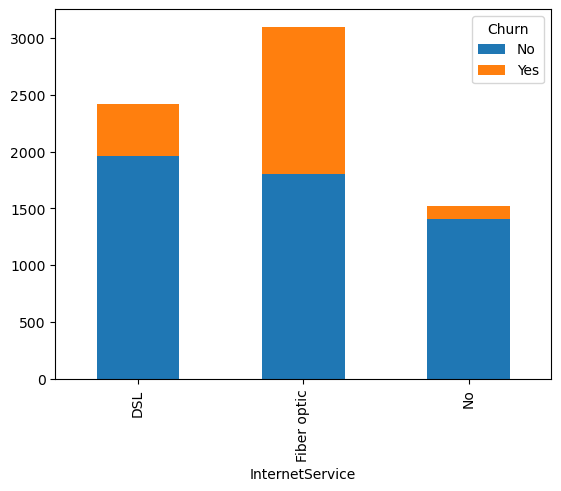

In [35]:
# Calculate the count of observations for each combination of categories
counts = dataset.groupby(['InternetService', 'Churn']).size().unstack()

# Create a stacked column chart
counts.plot(kind='bar', stacked=True)

<Axes: xlabel='PaymentMethod'>

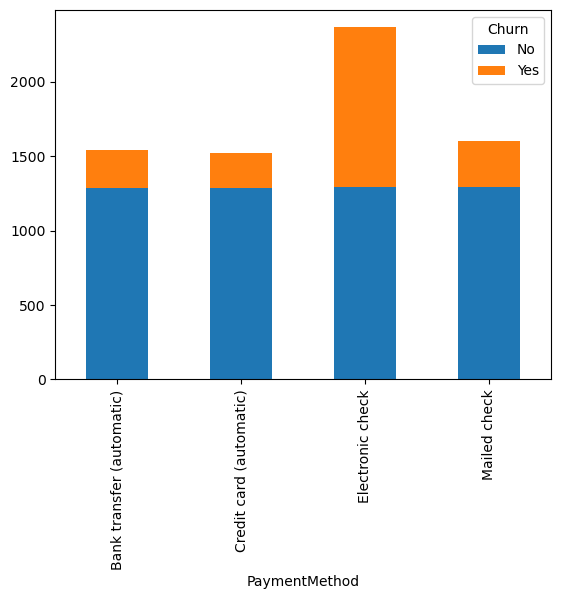

In [36]:
# Calculate the count of observations for each combination of categories
counts = dataset.groupby(['PaymentMethod', 'Churn']).size().unstack()

# Create a stacked column chart
counts.plot(kind='bar', stacked=True)

In [37]:
# # Calculate the count of observations for each combination of categories
# counts = df.groupby(['PaperlessBilling', 'Churn']).size().unstack()

# # Create a stacked column chart
# counts.plot(kind='bar', stacked=True)

In [67]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

df = dataset.copy(True)
df = df.drop('index', axis=1)
df = df.drop('TotalCharges', axis=1)

# Convert 'Churn' feature to numbers
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

# One-hot encode other features
df = pd.get_dummies(df, drop_first=False) #True

# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, class_weight={0: 0.68102614/2, 1: 1.88101604*2}, max_features=None, bootstrap=True)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))

[[899 134]
 [185 189]]


In [56]:
# n_samples / (n_classes * np.bincount(y))


np.bincount(y_test)

array([1033,  374], dtype=int64)

In [58]:
(1033+374) / (2 * np.bincount(y_test))

array([0.68102614, 1.88101604])

In [59]:
1033 * 0.68102614

703.5000026199999

In [60]:
374 * 1.88101604

703.49999896

In [69]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   Churn                                    7032 non-null   int32  
 3   gender_Female                            7032 non-null   uint8  
 4   gender_Male                              7032 non-null   uint8  
 5   SeniorCitizen_0                          7032 non-null   uint8  
 6   SeniorCitizen_1                          7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

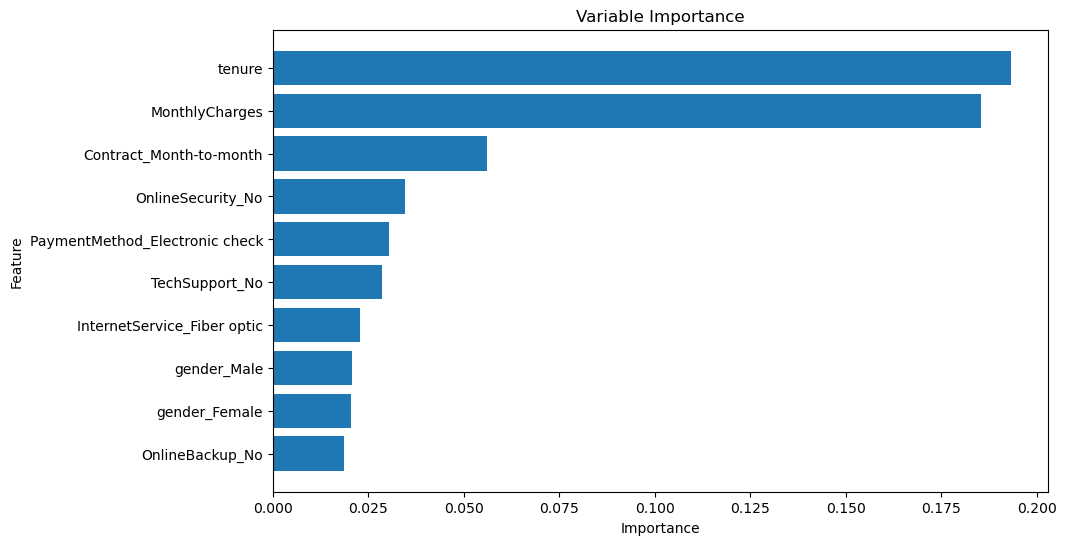

In [41]:
# Import necessary library
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Convert the importances into a DataFrame
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values('importance', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'].tail(10), importances_df['importance'].tail(10))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Variable Importance')
plt.show()

In [42]:
importances_df.sort_values('importance', ascending=False).head(10)

,feature,importance
0,tenure,0.193195
1,MonthlyCharges,0.185313
36,Contract_Month-to-month,0.056014
18,OnlineSecurity_No,0.034639
43,PaymentMethod_Electronic check,0.030336
27,TechSupport_No,0.028477
16,InternetService_Fiber optic,0.022678
3,gender_Male,0.020686
2,gender_Female,0.020474
21,OnlineBackup_No,0.018556
